In [ ]:
import sqlite3

conn = sqlite3.connect('cars.sqlite3')
conn.close()

conn = sqlite3.connect('cars.sqlite3')
curs = conn.cursor()

script = """CREATE TABLE cars ( 
                link TEXT NOT NULL PRIMARY KEY,
                brand TEXT NOT NULL,
                country TEXT,
                year REAL NOT NULL,
                engine_power REAL NOT NULL,
                fuel TEXT NOT NULL,
                tank_volume REAL,
                gear_shift_box TEXT NOT NULL,
                drive_train TEXT NOT NULL,
                price REAL NOT NULL
                ) 
                """

curs.executescript(script)
conn.close()

In [ ]:
HEADERS = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) Gecko/20100101 Firefox/49.0',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
            'Accept-Language': 'en-US,en;q=0.5',
            'Accept-Encoding': 'gzip, deflate',
            'DNT': '1',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1'
        }

import requests
from bs4 import BeautifulSoup

BASE = []
for page in range (1,353):
    SITE = f'https://auto.ria.com/uk/newauto/search/?page={page}&categoryId=1'
    
    r = requests.get(SITE, headers = HEADERS)

    if r.status_code == 200:
        soup = BeautifulSoup(r.text, 'lxml')
        
        
        for el in soup.find('div', class_ = "na-gallery-view list-view").find_all('div', class_ = "proposition"): 
            link = 'https://auto.ria.com/uk' + el.find('a').get('href')
            brand = el.find('span', class_= "link").text.split(' ')[1]
            year = el.find('span', class_= "link").text.split(' ')[-2]
            fuel = el.find('span', class_= "item").text.split('   • ')[0].replace(' ','')
            gear_shift_box = el.find('div', class_= "proposition_information").text.split(' ')[-5]
            drive_train = el.find('div', class_= "proposition_information").text.split(' ')[-3]
            engine_power = el.find('div', class_= "proposition_equip size13").text.split(' к.с')[0].split('(')[-1]
            
            try:
                tank_volume = el.find('span', class_= "item").text.split('   • ')[1].replace(' л','')
            except IndexError as e:
                tank_volume = 0.0
            
            unformatted_price = el.find('span', class_= "green bold size22").text.replace(' $','')
            price = int(unformatted_price.replace(' ',''))
            
            if brand in ['Mitsubishi', 'Nissan', 'Mazda', 'Toyota', 'Suzuki', 'Honda', 'Subaru', 'Lexus', 'Infiniti', 'Kawasaki', 'Yamaha', 'Isuzu', 'Acura']: 
                country = 'Japan';
            elif brand in ['Mercedes-Benz', 'Volkswagen', 'Opel', 'BMW', 'Audi', 'Porsche']:
                country = 'Germany';
            elif brand in ['Peugeot', 'Renault', 'Citroen', 'DS']:
                country = 'France';
            elif brand in ['Kia', 'Hyundai']:
                country = 'Korea';
            elif brand in ['Chery', 'JAC', 'Lifan', 'FAW', 'Byton', 'Haval', 'Jetour']:
                country = 'China';
            elif brand in ['Ford', 'Jeep', 'GMC', 'Chevrolet', 'Tesla', 'Cadillac', 'Dodge', 'Lucid', 'Lincoln', 'Rivian']:
                country = 'USA';
            elif brand in ['Lada', 'ГАЗ', 'УАЗ', 'ЗАЗ']:
                country = 'Russia';
            elif brand in ['Fiat', 'Maserati', 'Iveco', 'Alfa Romeo', 'Lamborghini', 'Ferrari']:
                country = 'Italy';
            elif brand in ['Land Rover', 'Jaguar', 'MINI', 'Bentley', 'Rolls-Royce']:
                country = 'Great Britain';
            elif brand in ['Skoda']:
                country = 'Czech Republic'
            elif brand in ['ЗАЗ']:
                country = 'Ukraine';
            elif brand in ['Polestar', 'Volvo']:
                country = 'Sweden'
            elif brand in ['Ravon']:
                country = 'Uzbekistan';
            elif brand in ['SEAT']:
                country = 'Spain';
            else:
                country = None
                
            BASE = [ (link, brand, country, year, engine_power, fuel, tank_volume, gear_shift_box, drive_train, price) ]
            
            for object_info in BASE:
                conn = sqlite3.connect('cars.sqlite3')
                curs = conn.cursor()

                p = "INSERT INTO cars VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
                try:
                    curs.execute(p, object_info)
                    conn.commit()
                except Exception as e:
                    print(e)

                conn.close()

In [687]:
import pandas as pd
import sqlite3

con = sqlite3.connect("cars.sqlite3")
df = pd.read_sql_query("SELECT * from cars", con)

print(df.head())

con.close()

                                                link          brand  \
0  https://auto.ria.com/uk/newauto/auto-volkswage...     Volkswagen   
1  https://auto.ria.com/uk/newauto/auto-bentley-c...        Bentley   
2  https://auto.ria.com/uk/newauto/auto-bentley-f...        Bentley   
3  https://auto.ria.com/uk/newauto/auto-mercedes-...  Mercedes-Benz   
4  https://auto.ria.com/uk/newauto/auto-mercedes-...  Mercedes-Benz   

         country    year  engine_power    fuel  tank_volume gear_shift_box  \
0        Germany  2021.0         231.0  Дизель          3.0        Автомат   
1  Great Britain  2021.0         550.0  Бензин          4.0        Автомат   
2  Great Britain  2021.0         550.0  Бензин          4.0        Автомат   
3        Germany  2020.0         435.0  Бензин          3.0        Автомат   
4        Germany  2021.0         330.0  Дизель          2.9        Автомат   

  drive_train     price  
0      Повний   61300.0  
1      Повний  355100.0  
2      Повний  375002.0  


In [688]:
df.head()

,link,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,https://auto.ria.com/uk/newauto/auto-volkswage...,Volkswagen,Germany,2021.0,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,https://auto.ria.com/uk/newauto/auto-bentley-c...,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,https://auto.ria.com/uk/newauto/auto-bentley-f...,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2021.0,330.0,Дизель,2.9,Автомат,Повний,116866.0


In [689]:
df[df['price'] > 800000]

,link,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
1816,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,630.0,Бензин,0.0,Автомат,Повний,1398503.0
3562,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,630.0,Бензин,6.0,Автомат,Задній,1075770.0
3771,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,630.0,Бензин,6.0,Автомат,Задній,956240.0
3894,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2020.0,585.0,Бензин,4.0,Автомат,Повний,836710.0
4064,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2018.0,630.0,Бензин,0.0,Автомат,Повний,1328113.0
4305,https://auto.ria.com/uk/newauto/auto-mercedes-...,Mercedes-Benz,Germany,2021.0,800.0,Бензин,4.0,Автомат,Повний,800852.0


In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link            6393 non-null   object 
 1   brand           6393 non-null   object 
 2   country         6230 non-null   object 
 3   year            6393 non-null   float64
 4   engine_power    6393 non-null   float64
 5   fuel            6393 non-null   object 
 6   tank_volume     6393 non-null   float64
 7   gear_shift_box  6393 non-null   object 
 8   drive_train     6393 non-null   object 
 9   price           6393 non-null   float64
dtypes: float64(4), object(6)
memory usage: 499.6+ KB


In [691]:
df.describe()

,year,engine_power,tank_volume,price
count,6393.000000,6393.000000,6393.000000,6.393000e+03
mean,2020.668387,182.301111,1.910605,5.126554e+04
std,0.525772,116.109321,0.816865,7.120338e+04
min,2017.000000,67.000000,0.000000,7.477000e+03
25%,2020.000000,117.000000,1.500000,2.069500e+04
50%,2021.000000,147.000000,1.600000,2.845600e+04
75%,2021.000000,194.000000,2.000000,4.660200e+04
max,2021.000000,800.000000,6.700000,1.398503e+06


In [692]:
df = df.drop(columns="link")

In [693]:
df.head(10)

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,Volkswagen,Germany,2021.0,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,Bentley,Great Britain,2021.0,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,Mercedes-Benz,Germany,2020.0,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,Mercedes-Benz,Germany,2021.0,330.0,Дизель,2.9,Автомат,Повний,116866.0
5,Mercedes-Benz,Germany,2020.0,435.0,Бензин,3.0,Автомат,Повний,119529.0
6,Mercedes-Benz,Germany,2020.0,194.0,Дизель,1.9,Автомат,Повний,74567.0
7,Volkswagen,Germany,2021.0,286.0,Дизель,3.0,Автомат,Повний,79150.0
8,Mercedes-Benz,Germany,2021.0,245.0,Дизель,1.9,Автомат,Повний,81038.0
9,Mercedes-Benz,Germany,2021.0,163.0,Дизель,1.9,Автомат,Повний,66803.0


In [694]:
df.isnull().sum()

brand               0
country           163
year                0
engine_power        0
fuel                0
tank_volume         0
gear_shift_box      0
drive_train         0
price               0
dtype: int64

In [695]:
df['brand'] = df['brand'].replace(['Land'],'Land Rover')
df['brand'] = df['brand'].replace(['Alfa'],'Alfa Romeo')

In [696]:
df.loc[df['brand'] == 'Land Rover', 'country'] = 'Great Britain'
df.loc[df['brand'] == 'Alfa Romeo', 'country'] = 'Italy'

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           6393 non-null   object 
 1   country         6393 non-null   object 
 2   year            6393 non-null   float64
 3   engine_power    6393 non-null   float64
 4   fuel            6393 non-null   object 
 5   tank_volume     6393 non-null   float64
 6   gear_shift_box  6393 non-null   object 
 7   drive_train     6393 non-null   object 
 8   price           6393 non-null   float64
dtypes: float64(4), object(5)
memory usage: 449.6+ KB


In [698]:
df['year'].value_counts()

2021.0    4418
2020.0    1858
2019.0      91
2018.0      24
2017.0       2
Name: year, dtype: int64

In [699]:
df = df.astype({'year':'int'},errors='ignore')
df

,brand,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price
0,Volkswagen,Germany,2021,231.0,Дизель,3.0,Автомат,Повний,61300.0
1,Bentley,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,355100.0
2,Bentley,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,375002.0
3,Mercedes-Benz,Germany,2020,435.0,Бензин,3.0,Автомат,Повний,192711.0
4,Mercedes-Benz,Germany,2021,330.0,Дизель,2.9,Автомат,Повний,116866.0
...,...,...,...,...,...,...,...,...,...
6388,Lada,Russia,2021,106.0,Бензин,1.6,Механічна,Передній,11315.0
6389,Lada,Russia,2021,87.0,Бензин,1.6,Механічна,Передній,7654.0
6390,Jetour,China,2021,147.0,Бензин,1.5,Автомат,Передній,19900.0
6391,Chery,China,2020,147.0,Бензин,1.5,Автомат,Передній,22000.0


In [700]:
df['year'].value_counts()

2021    4418
2020    1858
2019      91
2018      24
2017       2
Name: year, dtype: int64

In [701]:
df = df.loc[df['year'] != 2017]

In [702]:
df['year'].value_counts()

2021    4418
2020    1858
2019      91
2018      24
Name: year, dtype: int64

In [703]:
m = df.groupby(['country']).agg({'price': ['min']})
m['price mean'] = round(df.groupby(['country']).agg({'price': ['mean']}), 2)
m['price max'] = df.groupby(['country']).agg({'price': ['max']})
m

,price,price mean,price max
,min,,
country,,,
China,10400.0,17717.90,44604.0
Czech Republic,15547.0,28346.30,44455.0
France,11689.0,25462.04,74431.0
Germany,16499.0,115389.11,1398503.0
Great Britain,37096.0,154186.82,711204.0
Italy,12096.0,44185.13,490444.0
Japan,15946.0,32837.60,251013.0
Korea,13500.0,26063.26,62280.0


In [704]:
dummies_1 = pd.get_dummies(df["brand"])
dummies_1.head()

,Acura,Alfa Romeo,Audi,BMW,Bentley,Cadillac,Chery,Chevrolet,Citroen,DS,...,Rolls-Royce,SEAT,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo,ГАЗ,УАЗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [705]:
del df["brand"]
df = pd.concat([df, dummies_1],axis=1, join="inner")
df.head()

,country,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,...,Rolls-Royce,SEAT,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo,ГАЗ,УАЗ
0,Germany,2021,231.0,Дизель,3.0,Автомат,Повний,61300.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,355100.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Great Britain,2021,550.0,Бензин,4.0,Автомат,Повний,375002.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Germany,2020,435.0,Бензин,3.0,Автомат,Повний,192711.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Germany,2021,330.0,Дизель,2.9,Автомат,Повний,116866.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [706]:
dummies_2 = pd.get_dummies(df["country"])
dummies_2.head()

,China,Czech Republic,France,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [707]:
del df["country"]
df = pd.concat([df, dummies_2],axis=1, join="inner")
df.head()

,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,Audi,...,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
0,2021,231.0,Дизель,3.0,Автомат,Повний,61300.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021,550.0,Бензин,4.0,Автомат,Повний,355100.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2021,550.0,Бензин,4.0,Автомат,Повний,375002.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2020,435.0,Бензин,3.0,Автомат,Повний,192711.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2021,330.0,Дизель,2.9,Автомат,Повний,116866.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [708]:
df['fuel'].value_counts()

Бензин        3975
Дизель        1978
Гібрид         347
Електро         87
Бензин/Газ       4
Name: fuel, dtype: int64

In [709]:
df['fuel'] = df['fuel'].replace(['Гібрид'],'5.0')
df['fuel'] = df['fuel'].replace(['Електро'],'4.0')
df['fuel'] = df['fuel'].replace(['Бензин/Газ'],'3.0')
df['fuel'] = df['fuel'].replace(['Дизель'],'2.0')
df['fuel'] = df['fuel'].replace(['Бензин'],'1.0')

In [710]:
df['fuel'].value_counts()

1.0    3975
2.0    1978
5.0     347
4.0      87
3.0       4
Name: fuel, dtype: int64

In [711]:
df['gear_shift_box'].value_counts()

Автомат         3600
Механічна       1675
Варіатор         920
Роботизована     129
Тіптронік         59
Редуктор           8
Name: gear_shift_box, dtype: int64

In [712]:
df['gear_shift_box'] = df['gear_shift_box'].replace(['Варіатор'],'6.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Автомат'],'5.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Тіптронік'],'4.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Роботизована'],'3.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Механічна'],'2.0')
df['gear_shift_box'] = df['gear_shift_box'].replace(['Редуктор'],'1.0')

In [713]:
df['gear_shift_box'].value_counts()

5.0    3600
2.0    1675
6.0     920
3.0     129
4.0      59
1.0       8
Name: gear_shift_box, dtype: int64

In [714]:
df['drive_train'].unique()

array(['Повний', 'Передній', 'Задній', ''], dtype=object)

In [715]:
df = df.loc[df['drive_train'] != '']

In [716]:
df['drive_train'].unique()

array(['Повний', 'Передній', 'Задній'], dtype=object)

In [717]:
import warnings
warnings.filterwarnings("ignore")

In [718]:
df['drive_train'] = df['drive_train'].replace(['Повний'],'3.0')
df['drive_train'] = df['drive_train'].replace(['Передній'],'2.0')
df['drive_train'] = df['drive_train'].replace(['Задній'],'1.0')

In [719]:
df['drive_train'].unique()

array(['3.0', '2.0', '1.0'], dtype=object)

In [720]:
df = df.astype({'fuel':'float64', 'gear_shift_box':'float64', 'drive_train':'float64', 'price':'int'},errors='ignore')
df

,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,Audi,...,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
0,2021,231.0,2.0,3.0,5.0,3.0,61300,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021,550.0,1.0,4.0,5.0,3.0,355100,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2021,550.0,1.0,4.0,5.0,3.0,375002,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2020,435.0,1.0,3.0,5.0,3.0,192711,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2021,330.0,2.0,2.9,5.0,3.0,116866,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,2021,106.0,1.0,1.6,2.0,2.0,11315,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6389,2021,87.0,1.0,1.6,2.0,2.0,7654,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6390,2021,147.0,1.0,1.5,5.0,2.0,19900,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6391,2020,147.0,1.0,1.5,5.0,2.0,22000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [721]:
df[df['price'] > 800000]

,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,Audi,...,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
1816,2020,630.0,1.0,0.0,5.0,3.0,1398503,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3562,2020,630.0,1.0,6.0,5.0,1.0,1075770,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3771,2020,630.0,1.0,6.0,5.0,1.0,956240,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3894,2020,585.0,1.0,4.0,5.0,3.0,836710,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4064,2018,630.0,1.0,0.0,5.0,3.0,1328113,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4305,2021,800.0,1.0,4.0,5.0,3.0,800852,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [722]:
#фінальний датафрейм

data = df[df['price'] < 800000]

In [723]:
data.head()

,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,Audi,...,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
0,2021,231.0,2.0,3.0,5.0,3.0,61300,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021,550.0,1.0,4.0,5.0,3.0,355100,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2021,550.0,1.0,4.0,5.0,3.0,375002,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2020,435.0,1.0,3.0,5.0,3.0,192711,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2021,330.0,2.0,2.9,5.0,3.0,116866,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [724]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6340 entries, 0 to 6392
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6340 non-null   int32  
 1   engine_power    6340 non-null   float64
 2   fuel            6340 non-null   float64
 3   tank_volume     6340 non-null   float64
 4   gear_shift_box  6340 non-null   float64
 5   drive_train     6340 non-null   float64
 6   price           6340 non-null   int32  
 7   Acura           6340 non-null   uint8  
 8   Alfa Romeo      6340 non-null   uint8  
 9   Audi            6340 non-null   uint8  
 10  BMW             6340 non-null   uint8  
 11  Bentley         6340 non-null   uint8  
 12  Cadillac        6340 non-null   uint8  
 13  Chery           6340 non-null   uint8  
 14  Chevrolet       6340 non-null   uint8  
 15  Citroen         6340 non-null   uint8  
 16  DS              6340 non-null   uint8  
 17  Dodge           6340 non-null   u

In [725]:
data.describe()

,year,engine_power,fuel,tank_volume,gear_shift_box,drive_train,price,Acura,Alfa Romeo,Audi,...,Germany,Great Britain,Italy,Japan,Korea,Russia,Spain,Sweden,USA,Uzbekistan
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,...,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,2020.669401,182.232965,1.567192,1.911404,4.313565,2.328864,50446.462618,0.000158,0.001735,0.013880,...,0.207571,0.032808,0.033438,0.241798,0.138959,0.032808,0.004416,0.016088,0.059779,0.013880
std,0.521060,115.200507,0.991554,0.812311,1.452874,0.520796,63780.161566,0.012559,0.041621,0.117003,...,0.405600,0.178147,0.179793,0.428206,0.345931,0.178147,0.066314,0.125825,0.237096,0.117003
min,2018.000000,67.000000,1.000000,0.000000,1.000000,1.000000,7477.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,117.000000,1.000000,1.500000,2.000000,2.000000,20761.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,147.000000,1.000000,1.600000,5.000000,2.000000,28521.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,194.000000,2.000000,2.000000,5.000000,3.000000,46638.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,800.000000,5.000000,6.700000,6.000000,3.000000,711204.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


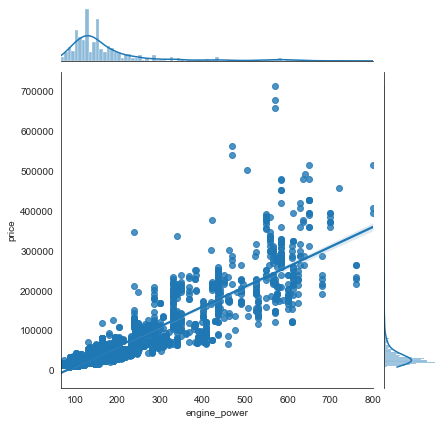

In [726]:
sns.jointplot(data=data, x="engine_power", y="price", kind="reg")

In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

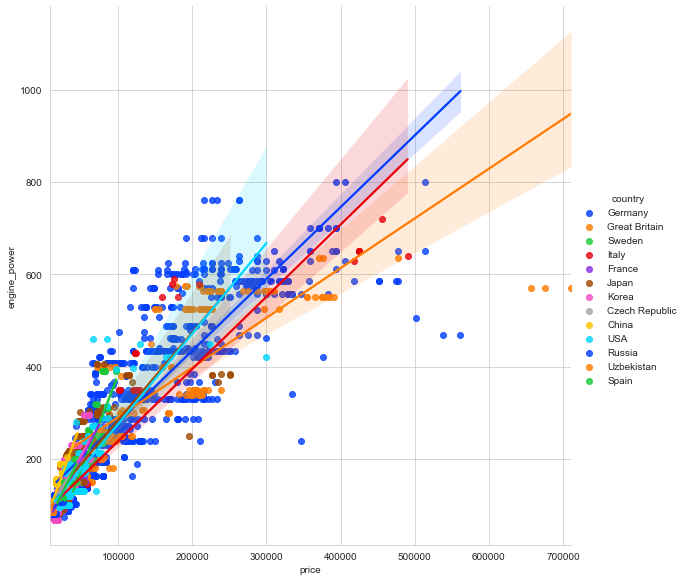

In [52]:
sns.lmplot('price','engine_power', data=data, hue='country',
           palette='bright',fit_reg=True, size=8)
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Spain')

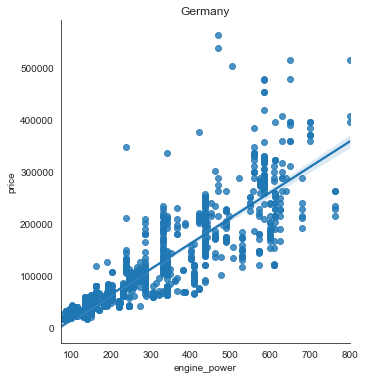

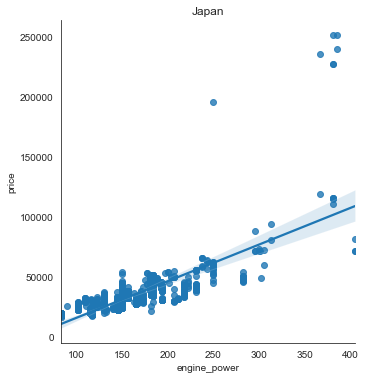

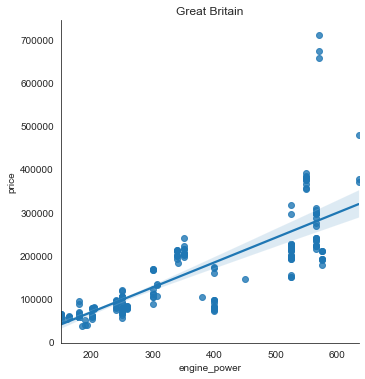

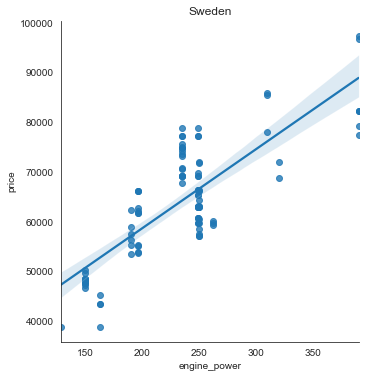

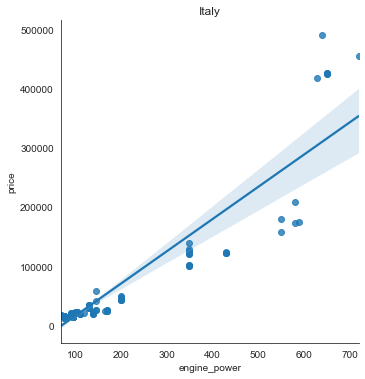

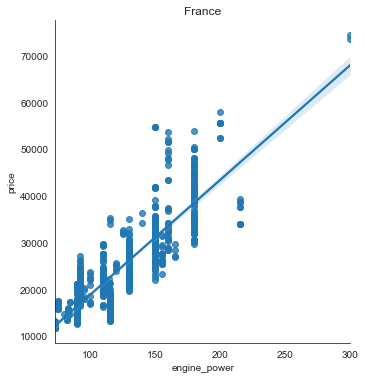

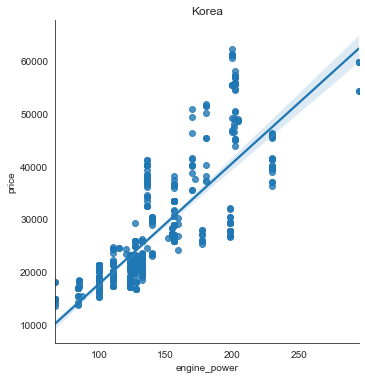

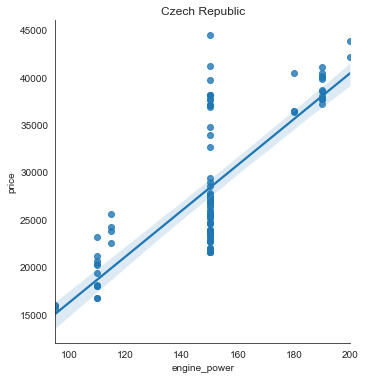

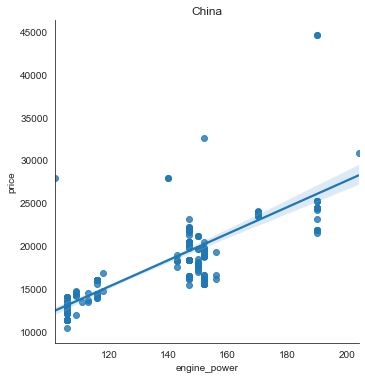

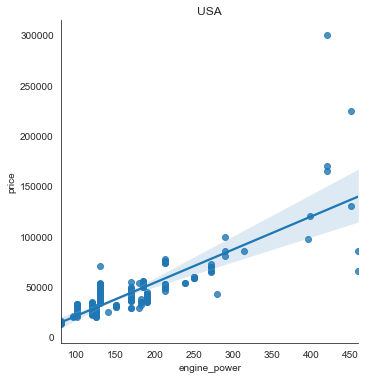

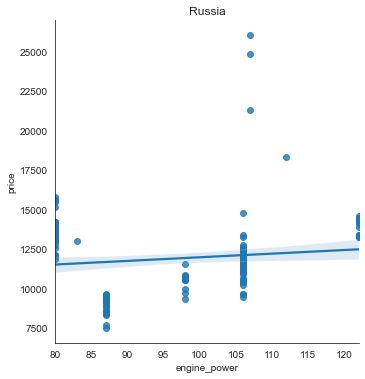

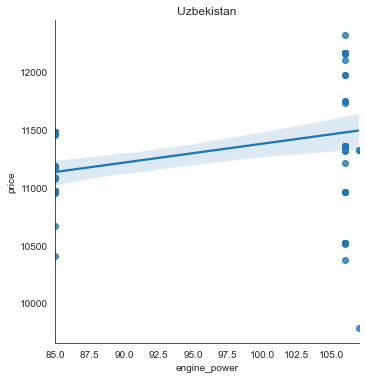

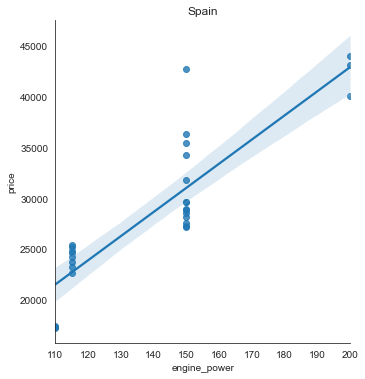

In [199]:
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Germany'], palette='coolwarm')
plt.title('Germany')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Japan'], palette='coolwarm')
plt.title('Japan')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Great Britain'], palette='coolwarm')
plt.title('Great Britain')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Sweden'], palette='coolwarm')
plt.title('Sweden')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Italy'], palette='coolwarm')
plt.title('Italy')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'France'], palette='coolwarm')
plt.title('France')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Korea'], palette='coolwarm')
plt.title('Korea')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Czech Republic'], palette='coolwarm')
plt.title('Czech Republic')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'China'], palette='coolwarm')
plt.title('China')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'USA'], palette='coolwarm')
plt.title('USA')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Russia'], palette='coolwarm')
plt.title('Russia')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Uzbekistan'], palette='coolwarm')
plt.title('Uzbekistan')
sns.lmplot(x='engine_power', y='price', data=data[data['country'] == 'Spain'], palette='coolwarm')
plt.title('Spain')

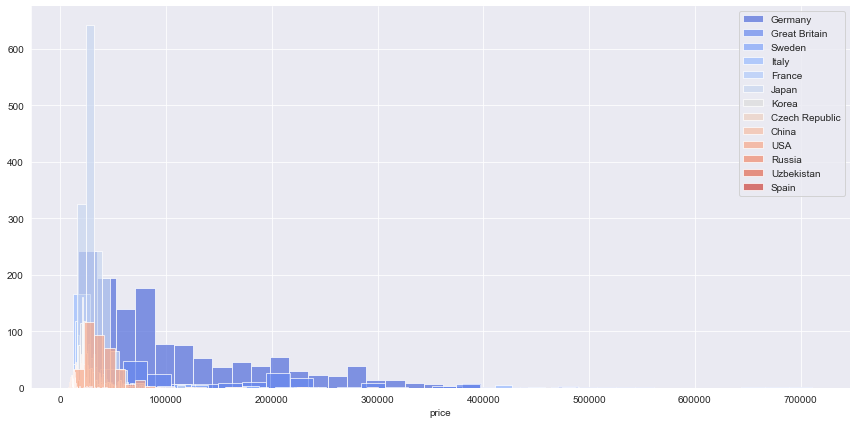

In [53]:
sns.set_style('darkgrid')

g = sns.FacetGrid(data, hue='country', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'price', bins=30, alpha=0.7)
plt.legend(loc=1)

<BarContainer object of 6340 artists>

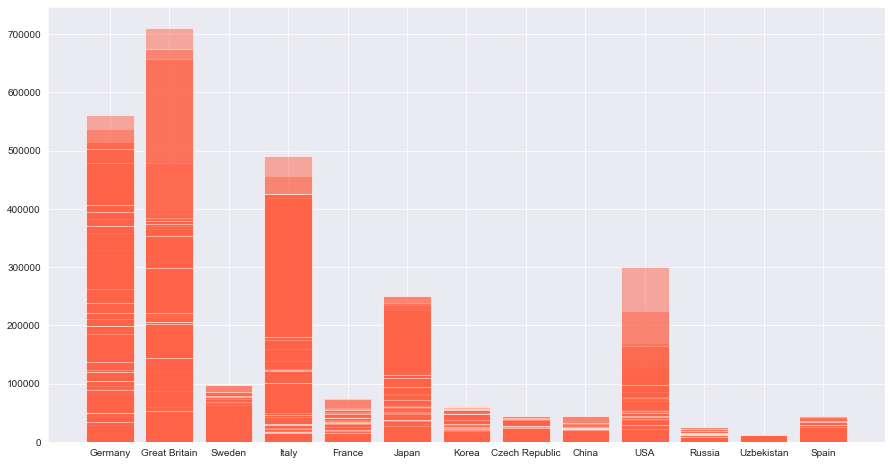

In [91]:
fig, axes = plt.subplots(figsize=(15,8))
x=data['country']
y=data['price']
axes.bar(x, y, alpha=0.5, color="tomato")

In [192]:
i = data.groupby(['brand']).agg({'price': ['min']})
i['price mean'] = round(data.groupby(['brand']).agg({'price': ['mean']}), 2)
i['price max'] = data.groupby(['brand']).agg({'price': ['max']})
i

,price,price mean,price max
,min,,
brand,,,
Acura,44405,44405.00,44405
Alfa Romeo,23788,36030.55,49018
Audi,43956,123701.85,310777
BMW,40989,109118.50,300000
Bentley,354156,382343.42,478119
Cadillac,165000,167499.50,169999
Chery,10400,16963.83,24032
Chevrolet,12988,71472.00,299999


In [191]:
l = data.groupby(['country']).agg({'price': ['min']})
l['price mean'] = round(data.groupby(['country']).agg({'price': ['mean']}), 2)
l['price max'] = data.groupby(['country']).agg({'price': ['max']})
l

,price,price mean,price max
,min,,
country,,,
China,10400,17770.52,44604
Czech Republic,15547,28346.30,44455
France,11689,25597.41,74431
Germany,16499,111065.69,561791
Great Britain,37096,154186.82,711204
Italy,12096,44185.13,490444
Japan,15946,32837.60,251013
Korea,13500,26063.26,62280


Text(0, 0.5, 'mean price')

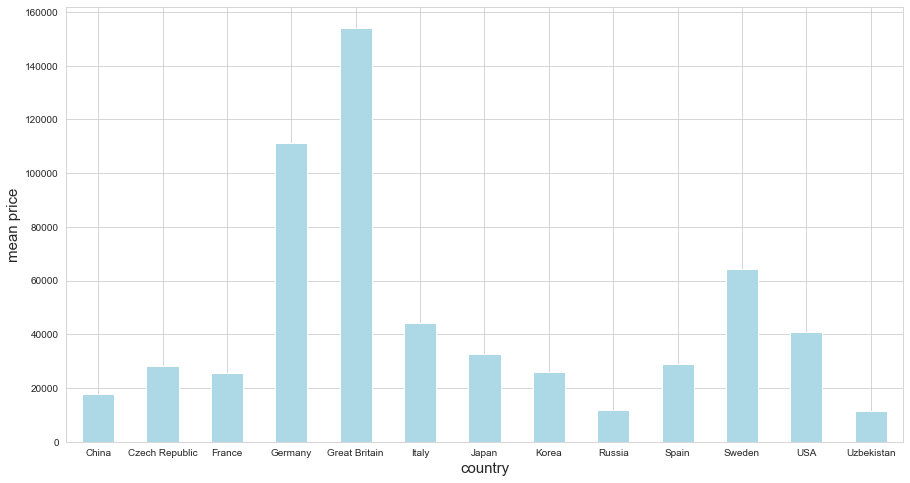

In [121]:
s = data.groupby(data['country'])['price'].mean()
fig, axis = plt.subplots(figsize=(15,8))
s.plot(kind='bar', rot=0, ax=axis, color="lightblue")
plt.xlabel("country", size=15)
plt.ylabel("mean price", size=15)

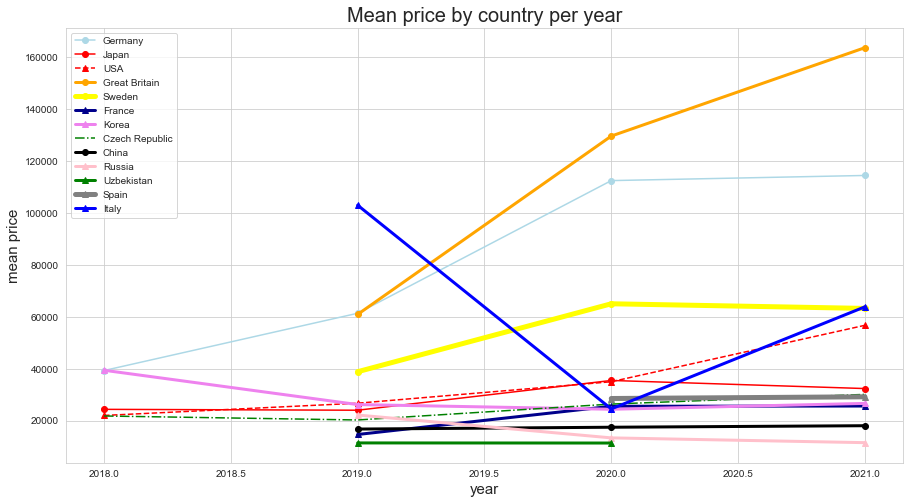

In [204]:
fig, axes = plt.subplots(figsize=(15,8))

axes.plot(data[data['country'] == 'Germany'].groupby(data['year'])['price'].mean(), color="lightblue", marker='o', label='Germany')
axes.plot(data[data['country'] == 'Japan'].groupby(data['year'])['price'].mean(), color="red", marker='o', label='Japan')
axes.plot(data[data['country'] == 'USA'].groupby(data['year'])['price'].mean(), "r--", marker='^', label='USA')
axes.plot(data[data['country'] == 'Great Britain'].groupby(data['year'])['price'].mean(), color="orange", linewidth=3, marker='o', label='Great Britain')
axes.plot(data[data['country'] == 'Sweden'].groupby(data['year'])['price'].mean(), color="yellow", linewidth=5, marker='o', label='Sweden')
axes.plot(data[data['country'] == 'France'].groupby(data['year'])['price'].mean(), color="darkblue", linewidth=3, marker='^', label='France')
axes.plot(data[data['country'] == 'Korea'].groupby(data['year'])['price'].mean(), color="violet", linewidth=3, marker='^', label='Korea')
axes.plot(data[data['country'] == 'Czech Republic'].groupby(data['year'])['price'].mean(), 'g-.', label='Czech Republic')
axes.plot(data[data['country'] == 'China'].groupby(data['year'])['price'].mean(), color="black", linewidth=3, marker='o', label='China')
axes.plot(data[data['country'] == 'Russia'].groupby(data['year'])['price'].mean(), color="pink", linewidth=3, marker='^', label='Russia')
axes.plot(data[data['country'] == 'Uzbekistan'].groupby(data['year'])['price'].mean(), color="green", linewidth=3, marker='^', label='Uzbekistan')
axes.plot(data[data['country'] == 'Spain'].groupby(data['year'])['price'].mean(), color="grey", linewidth=5, marker='^', label='Spain')
axes.plot(data[data['country'] == 'Italy'].groupby(data['year'])['price'].mean(), color="blue", linewidth=3, marker='^', label='Italy')
axes.legend(loc=2)
plt.xlabel('year', size=15)
plt.ylabel('mean price', size=15)
plt.title('Mean price by country per year', size=20)
sns.set_style('whitegrid')

In [169]:
data.groupby(['country', 'brand']).agg({'brand': ['count']})

brand
                             count
country        brand              
China          Chery           290
               FAW              14
               Haval            27
               JAC              28
               Jetour           36
Czech Republic Skoda           105
France         Citroen         186
               DS               12
               Peugeot         423
               Renault         264
Germany        Audi             88
               BMW              82
               Mercedes-Benz   604
               Opel            138
               Porsche          98
               Volkswagen      306
Great Britain  Bentley          12
               Jaguar           37
               Land Rover      152
               MINI              4
               Rolls-Royce       3
Italy          Alfa Romeo       11
               Ferrari           1
               Fiat            172
               Iveco             2
               Lamborghini       5
               Maserati         21
Japan          Acura             1
               Honda            79
               Infiniti         25
               Isuzu             2
               Lexus            36
               Mazda           265
               Mitsubishi      343
               Nissan          317
               Subaru           81
               Suzuki          209
               Toyota          175
Korea          Hyundai         363
               Kia             518
Russia         Lada            204
               ГАЗ               3
               УАЗ               1
Spain          SEAT             28
Sweden         Volvo           102
USA            Cadillac          2
               Chevrolet         5
               Dodge             1
               Ford            347
               GMC               1
               Jeep             22
               Lincoln           1
Uzbekistan     Ravon            88

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb0340>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb0a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ca0fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x18cbb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cbb400>],
 'means': []}

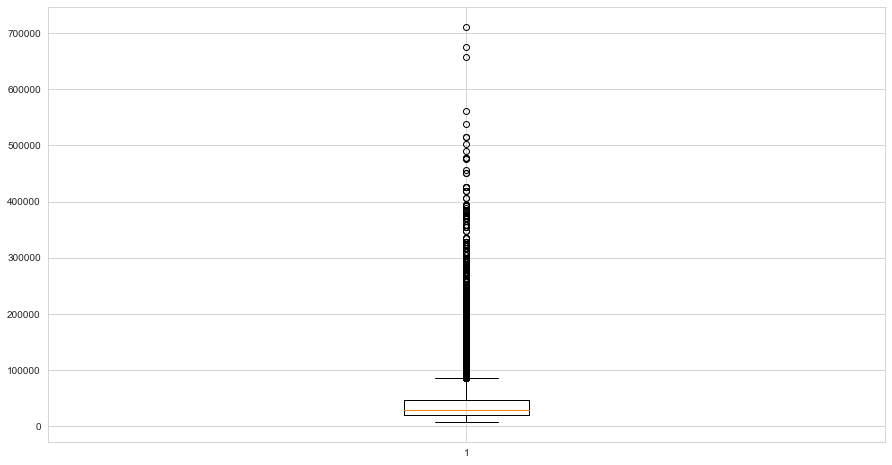

In [210]:
fig, axes = plt.subplots(figsize=(15,8))

plt.boxplot('price', data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x18d0c370>,
 'caps': [<matplotlib.lines.Line2D at 0x18d0ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cfdfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x18d17130>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d17490>],
 'means': []}

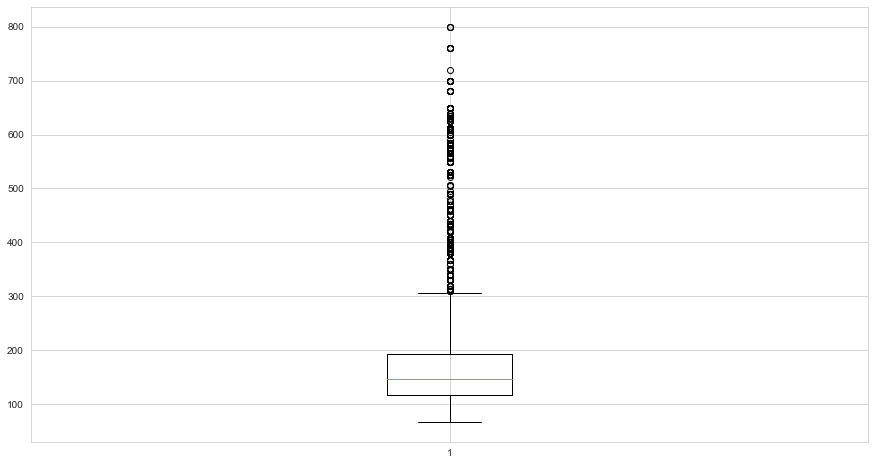

In [211]:
fig, axes = plt.subplots(figsize=(15,8))

plt.boxplot('engine_power', data=data)

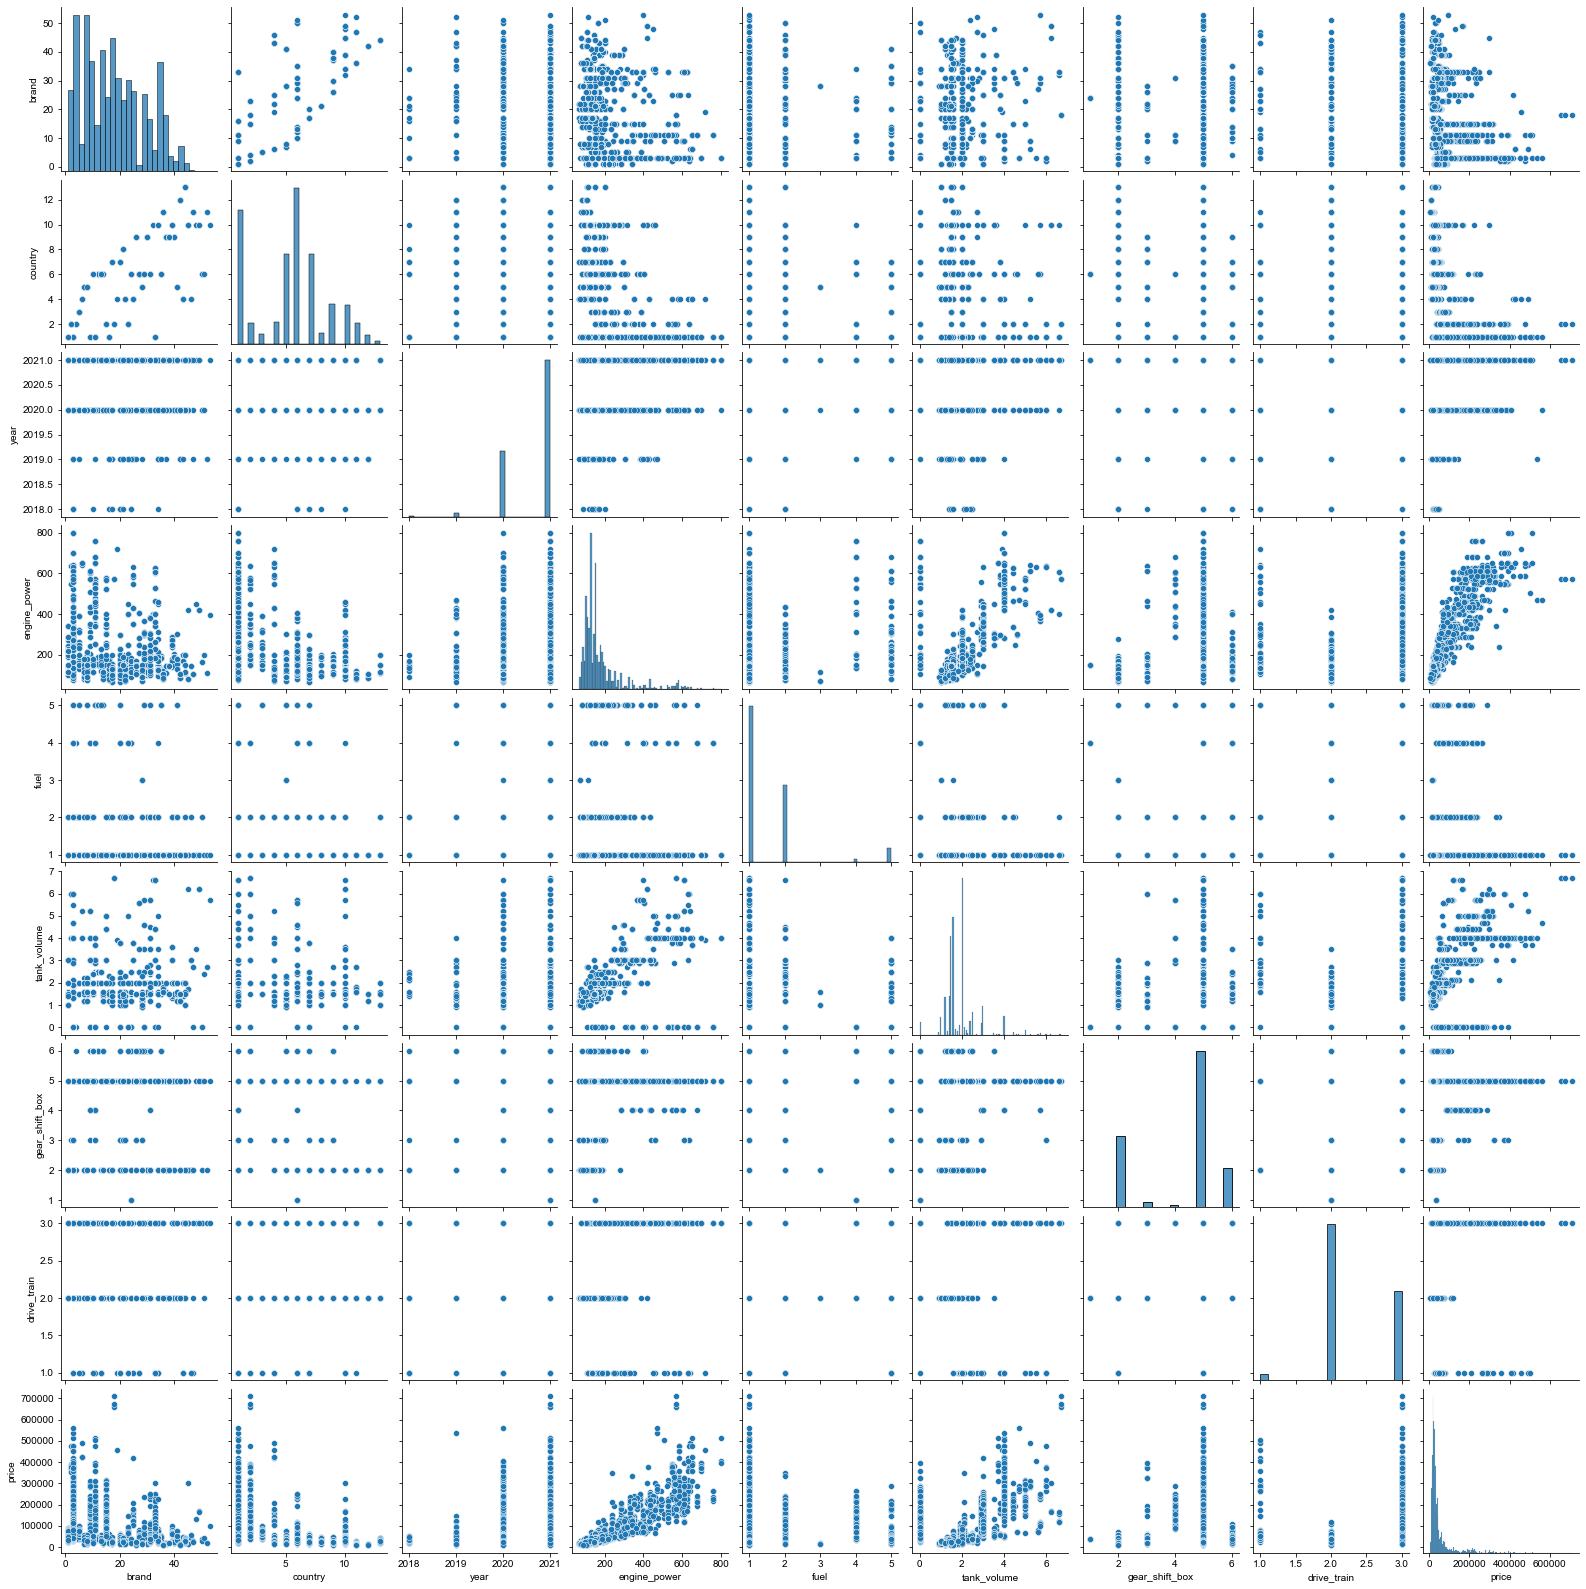

In [215]:
sns.pairplot(data)
sns.set_style('white')

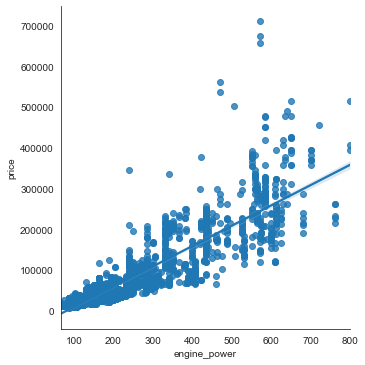

In [728]:
sns.lmplot(x = 'engine_power', y = 'price', data=data)

<AxesSubplot:xlabel='price', ylabel='Density'>

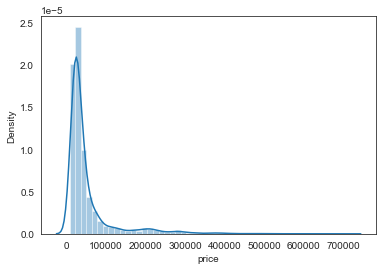

In [729]:
sns.distplot(data['price'])

### Моделювання

In [730]:
X = data.drop('price',axis=1)
y = data['price']

In [731]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Лінійна регресія

In [732]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [733]:
model_1.coef_

array([ 2.30570728e+03,  3.94896911e+02, -2.13715907e+03,  7.60775265e+03,
       -8.44912238e+02, -1.14182899e+03, -9.30192153e+03, -6.47317792e+04,
       -1.44724318e+04, -2.01122230e+04,  5.87145525e+04, -3.61069397e-10,
        8.82786825e+02,  2.69041875e+04, -4.65006316e+03, -1.79807651e+02,
       -4.53187175e+04, -4.90912387e+03,  1.23826554e+05, -4.81429369e+04,
        2.54308723e+04, -2.54136223e+04, -1.40861267e+04,  8.59612138e+03,
       -6.74444294e+03, -2.88449498e+04,  1.39623871e+04, -4.94177198e+04,
       -6.50243665e+02, -1.18334238e+05,  2.43413722e+03, -4.82328797e+03,
       -3.55814157e+03, -6.72797397e+03,  1.36836472e+05, -8.57038004e+04,
       -4.81275878e+03, -1.68070948e+04, -1.15355964e+05, -5.79424011e+04,
       -8.73348301e+03,  2.87971747e+04, -2.01832359e+03,  4.78583563e+03,
       -2.83679042e+03, -4.53180483e+03,  1.98567258e+04, -6.64547348e+03,
        2.46207625e+02,  3.60089891e+05, -6.84621795e+03, -9.60105633e+03,
        3.36644420e+03,  

In [734]:
coeff_rent = pd.DataFrame(model_1.coef_,X.columns,columns=['Coefficient'])
coeff_rent

,Coefficient
year,2305.707284
engine_power,394.896911
fuel,-2137.159067
tank_volume,7607.752652
gear_shift_box,-844.912238
...,...
Russia,-11195.002129
Spain,-6846.217948
Sweden,-6063.095747
USA,-32770.237571


In [735]:
importances_ = model_1.coef_.flatten()
indices = np.argsort(importances_)[::-1]

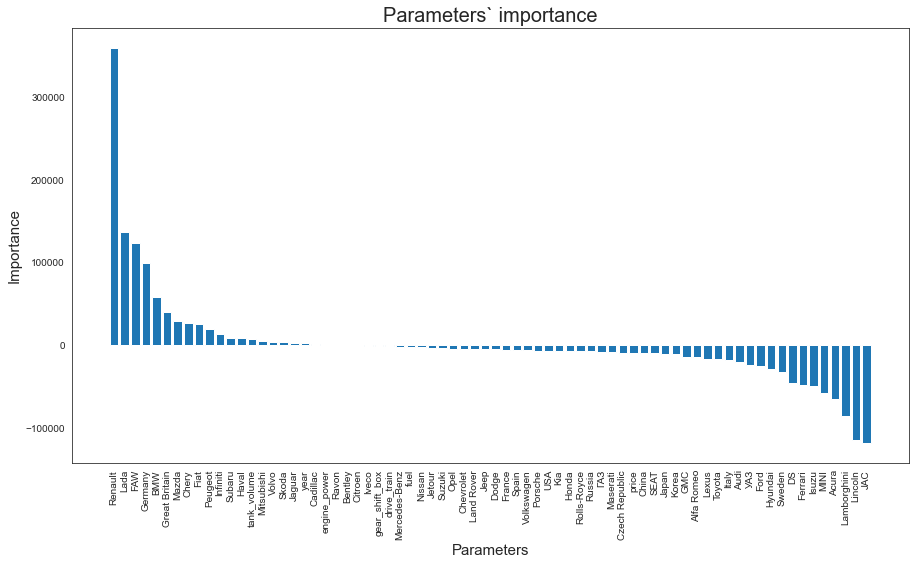

In [736]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_[indices])
plt.xticks(rotation=90)
plt.show()

In [737]:
model_1.score(X_train,y_train)

0.8790166448113139

In [738]:
model_1.score(X_test, y_test)

0.9031410513779253

In [851]:
predictions_1 = model_1.predict(X_test)

In [741]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_1)))

MAE: 11527.785478838294
MSE: 397621093.9604858
RMSE: 19940.438660182124


In [461]:
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_test, predictions_1))

In [867]:
predict_arr = np.zeros(72)

input_year = input("Enter year: ")
input_engine_power = input("Enter engine_power: ")
input_fuel = input("Enter fuel: ")
input_tank = input("Enter tank_volume: ")
input_gear = input("Enter gear_shift_box: ")
input_drive = input("Enter drive_train: ")
input_country = input("Enter country: ")
input_brand = input("Enter car brand: ")
i = data.columns.get_loc(input_country)
l = data.columns.get_loc(input_brand)

try:
    predict_arr[0] = input_year
    predict_arr[1] = input_engine_power
    predict_arr[2] = input_fuel
    predict_arr[3] = input_tank
    predict_arr[4] = input_gear
    predict_arr[5] = input_drive
    predict_arr[i-1] = 1
    predict_arr[l-1] = 1
except:
    raise AttributeError

predict_arr

Enter year: 2021
Enter engine_power: 340
Enter fuel: 1
Enter tank_volume: 3
Enter gear_shift_box: 5
Enter drive_train: 3
Enter country: Germany
Enter car brand: Volkswagen


array([2.021e+03, 3.400e+02, 1.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [744]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_1 = model_1.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_1

array([109689.68916576])

In [229]:
# реальна ціна автомобіля - 71 211 $

In [745]:
result = {}

In [746]:
result['LinearRegression'] = f'Test R^2 = {round(model_1.score(X_test, y_test), 4)}'

### Дерево рішень

In [748]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

for i in range(1,25):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    print(f'qty_depth = {i} Score = {dtree.score(X_train,y_train)}')

qty_depth = 1 Score = 0.6668137513762005
qty_depth = 2 Score = 0.7948114664980945
qty_depth = 3 Score = 0.842373400165355
qty_depth = 4 Score = 0.875800592840148
qty_depth = 5 Score = 0.896293834555386
qty_depth = 6 Score = 0.9201723232359855
qty_depth = 7 Score = 0.9358146501388123
qty_depth = 8 Score = 0.947092963378457
qty_depth = 9 Score = 0.9572014210201994
qty_depth = 10 Score = 0.9639966642524437
qty_depth = 11 Score = 0.9679000649512653
qty_depth = 12 Score = 0.9708925245414
qty_depth = 13 Score = 0.9720370727821425
qty_depth = 14 Score = 0.9723563999721674
qty_depth = 15 Score = 0.9724603137032966
qty_depth = 16 Score = 0.972492614913895
qty_depth = 17 Score = 0.9725115226176496
qty_depth = 18 Score = 0.9725189142423156
qty_depth = 19 Score = 0.9725207282899574
qty_depth = 20 Score = 0.9725209679493882
qty_depth = 21 Score = 0.9725210978626069
qty_depth = 22 Score = 0.9725210978626069
qty_depth = 23 Score = 0.9725210978626069
qty_depth = 24 Score = 0.9725210978626069


In [749]:
model_2 = DecisionTreeRegressor(max_depth=21)
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=21)

In [750]:
model_2.score(X_train,y_train)

0.9725210978626069

In [751]:
model_2.score(X_test, y_test)

0.9391317698623047

In [754]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_2)))

MAE: 5003.814229460336
MSE: 249873580.07800144
RMSE: 15807.390046367598


In [752]:
predictions_2 = model_2.predict(X_test)

In [753]:
result['DecisionTreeRegressor'] = f'Test R^2 = {round(model_2.score(X_test, y_test), 4)}'

In [755]:
importances_2 = model_2.feature_importances_
indices = np.argsort(importances_2)[::-1]

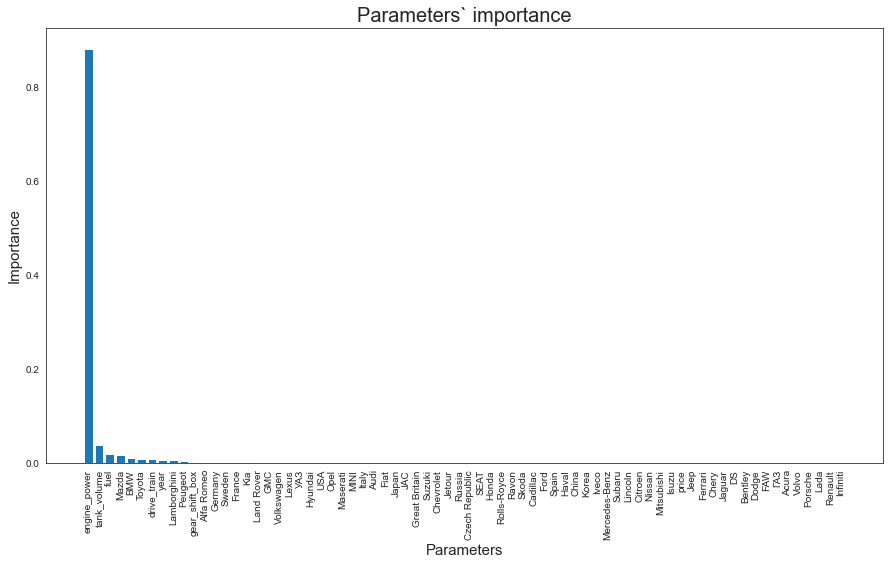

In [756]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_2[indices])
plt.xticks(rotation=90)
plt.show()

In [757]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_2 = model_2.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_2

array([73737.375])

In [758]:
# реальна ціна автомобіля - 71 211 $

### Random Forest

In [759]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train, y_train)

result['RandomForestRegressor'] = f'Test R^2 = {round(model_3.score(X_test, y_test), 4)} '

In [760]:
model_3.score(X_train, y_train)

0.9663669344627227

In [761]:
model_3.score(X_test,y_test)

0.9453378016584275

In [763]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_3))
print('MSE:', metrics.mean_squared_error(y_test, predictions_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_3)))

MAE: 5007.581906675893
MSE: 224396851.42222992
RMSE: 14979.881555680937


In [762]:
predictions_3 = model_3.predict(X_test)

In [764]:
importances_3 = model_3.feature_importances_
indices = np.argsort(importances_3)[::-1]

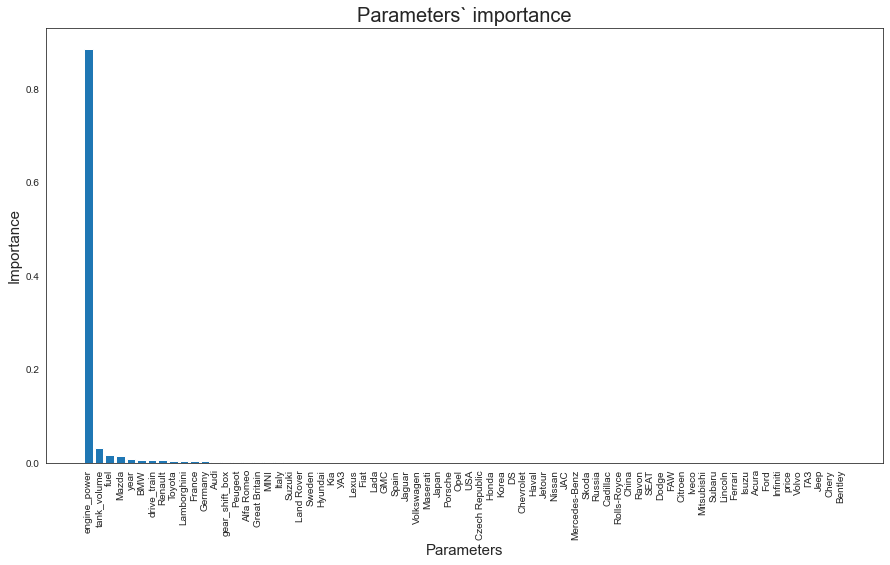

In [765]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_3[indices])
plt.xticks(rotation=90)
plt.show()

In [766]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_3 = model_3.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_3

array([74097.04947272])

In [767]:
# реальна ціна автомобіля - 71 211 $

### XGB Boost

In [768]:
import xgboost as xgb
from xgboost import XGBRegressor

model_4 = xgb.XGBRegressor(n_estimators=200)
model_4

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [769]:
model_4.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [770]:
model_4.score(X_train, y_train)

0.9723475206340607

In [771]:
model_4.score(X_test,y_test)

0.9303614875144459

In [774]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_4))
print('MSE:', metrics.mean_squared_error(y_test, predictions_4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_4)))

MAE: 5109.1274691319995
MSE: 285876957.26831686
RMSE: 16907.89629931284


In [772]:
predictions_4 = model_4.predict(X_test)

In [773]:
result['XGBRegressor'] = f'Test R^2 = {round(model_4.score(X_test, y_test), 4)}'

In [775]:
importances_4 = model_4.feature_importances_
indices = np.argsort(importances_4)[::-1]

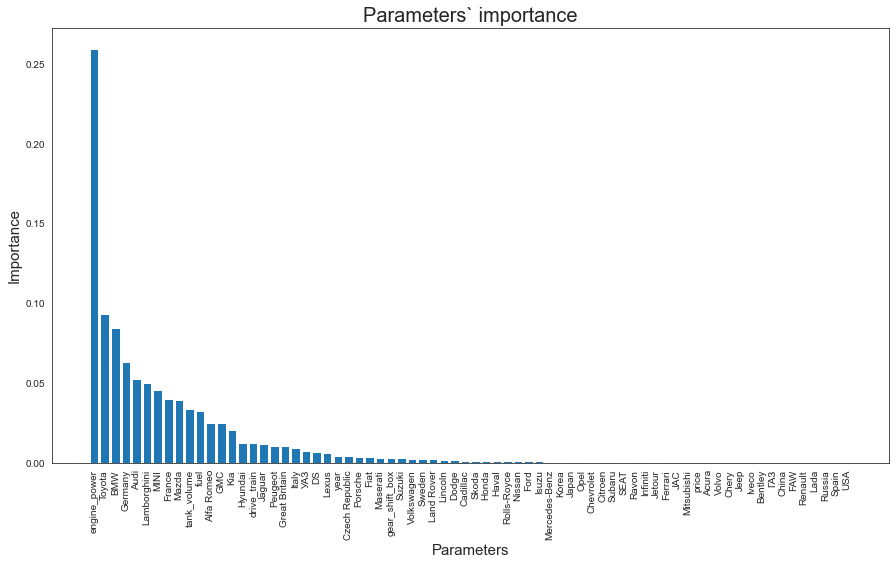

In [776]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_4[indices])
plt.xticks(rotation=90)
plt.show()

In [777]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_4 = model_4.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_4

array([73762.695], dtype=float32)

In [778]:
# реальна ціна автомобіля - 71 211 $

### Bagging Regressor

In [779]:
from sklearn.ensemble import BaggingRegressor

model_5 = BaggingRegressor(n_estimators=200)
model_5

BaggingRegressor(n_estimators=200)

In [780]:
model_5.fit(X_train, y_train)

BaggingRegressor(n_estimators=200)

In [781]:
model_5.score(X_train, y_train)

0.9663711388661019

In [782]:
model_5.score(X_test,y_test)

0.9463068908788026

In [785]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_5))
print('MSE:', metrics.mean_squared_error(y_test, predictions_5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_5)))

MAE: 4987.589948915292
MSE: 220418588.99596384
RMSE: 14846.500900749774


In [783]:
predictions_5 = model_5.predict(X_test)

In [784]:
result['BaggingRegressor'] = f'Test R^2 = {round(model_5.score(X_test, y_test), 4)}'

In [786]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_5 = model_5.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_5

array([73722.07295508])

In [787]:
# реальна ціна автомобіля - 71 211 $

### Gradient Boosting Regressor

In [788]:
from sklearn.ensemble import GradientBoostingRegressor

model_6 = GradientBoostingRegressor(n_estimators=200)
model_6

GradientBoostingRegressor(n_estimators=200)

In [789]:
model_6.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [790]:
model_6.score(X_train, y_train)

0.9543633800768756

In [791]:
model_6.score(X_test,y_test)

0.9404646507724556

In [794]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_6))
print('MSE:', metrics.mean_squared_error(y_test, predictions_6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_6)))

MAE: 6425.255463728908
MSE: 244401896.01418686
RMSE: 15633.358436823064


In [792]:
predictions_6 = model_6.predict(X_test)

In [793]:
result['GradientBoostingRegressor'] = f'Test R^2 = {round(model_6.score(X_test, y_test), 4)}'

In [795]:
importances_6 = model_6.feature_importances_
indices = np.argsort(importances_6)[::-1]

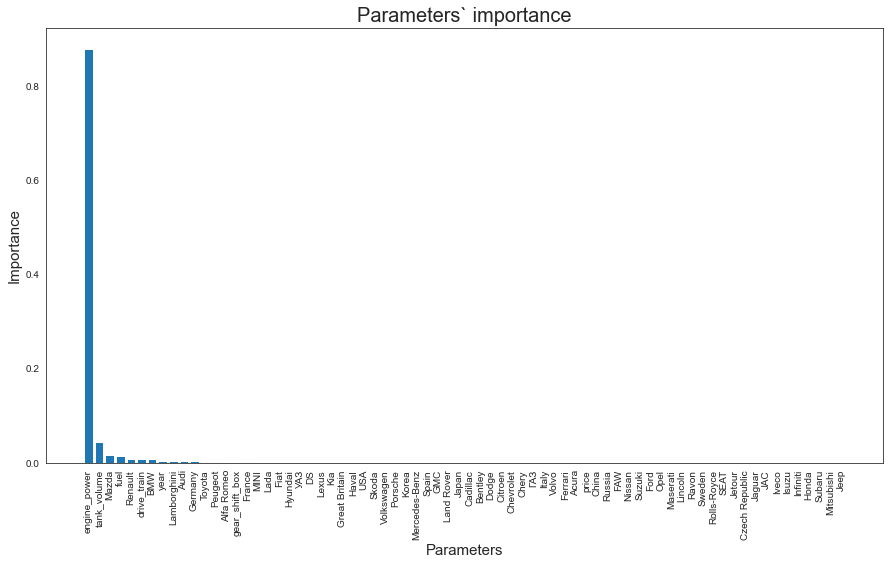

In [796]:
plt.figure(figsize=(15, 8))

plt.title('Parameters` importance', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Parameters', size=15)

plt.bar(data.columns[indices], importances_6[indices])
plt.xticks(rotation=90)
plt.show()

In [797]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_6 = model_6.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_6

array([106776.60908591])

In [798]:
# реальна ціна автомобіля - 71 211 $

### Ансамбль Voting

In [799]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[('m1',model_1),('m2', model_2),('m3', model_3),('m4', model_4), ('m5', model_5), ('m6', model_6)])
ensemble.fit(X,y)

VotingRegressor(estimators=[('m1', LinearRegression()),
                            ('m2', DecisionTreeRegressor(max_depth=21)),
                            ('m3', RandomForestRegressor()),
                            ('m4',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=200, n_jobs=4,


In [800]:
ensemble.score(X_train, y_train)

0.9638693160068686

In [801]:
ensemble.score(X_test,y_test)

0.9738959330481685

In [804]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ensemble))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ensemble))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ensemble)))

MAE: 4379.340936354549
MSE: 107161267.03691565
RMSE: 10351.872634307072


In [802]:
predictions_ensemble = ensemble.predict(X_test)

In [803]:
result['Ensemble VotingRegressor'] = f'Test R^2 = {round(ensemble.score(X_test, y_test), 4)}'

In [805]:
# передбачаємо ціну на автомобіль Volkswagen (Germany), 2021 року випуску, 340 к.с., бензиновий двигун обємом 3 л, коробка передач автомат, повний привід

predictions_ensemble = ensemble.predict(np.array([2021, 340, 1, 3, 5, 3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(1, -1))
predictions_ensemble

array([82623.40384546])

In [291]:
# реальна ціна автомобіля - 71 211 $

In [806]:
result

{'LinearRegression': 'Test R^2 = 0.9031',
 'DecisionTreeRegressor': 'Test R^2 = 0.9391',
 'RandomForestRegressor': 'Test R^2 = 0.9453 ',
 'XGBRegressor': 'Test R^2 = 0.9304',
 'BaggingRegressor': 'Test R^2 = 0.9463',
 'GradientBoostingRegressor': 'Test R^2 = 0.9405',
 'Ensemble VotingRegressor': 'Test R^2 = 0.9739'}

In [807]:
_predictions = {}

In [808]:
_predictions['LinearRegression'] = int(predictions_1)
_predictions['DecisionTreeRegressor'] = int(predictions_2)
_predictions['RandomForestRegressor'] = int(predictions_3)
_predictions['XGBRegressor'] = int(predictions_4)
_predictions['BaggingRegressor'] = int(predictions_5)
_predictions['GradientBoostingRegressor'] = int(predictions_6)
_predictions['Ensemble VotingRegressor'] = int(predictions_ensemble)

In [809]:
_predictions

{'LinearRegression': 109689,
 'DecisionTreeRegressor': 73737,
 'RandomForestRegressor': 74097,
 'XGBRegressor': 73762,
 'BaggingRegressor': 73722,
 'GradientBoostingRegressor': 106776,
 'Ensemble VotingRegressor': 82623}

### Кросс-валидация

- Оценивание эффективности каждого алгоритма выполняется с помощью кросс-валидации. Выводимое сообщение содержит следующие сведения: имя модели в виде аббревиатуры, средняя оценка 10-кратной перекрёстной проверки на тренировочных данных (метрика ‘r2’), в скобках представлено среднее квадратичное отклонение (standard deviation), а также коэффициент детерминации r2 на тестовых данных.

In [810]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot

In [811]:
X = data.drop('price',axis=1)
Y = data['price']

In [814]:
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [815]:
num_folds = 10
n_estimators = 200
scoring = 'r2'
seed = 7

In [816]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=n_estimators)))
models.append(('XGBRegressor', XGBRegressor(n_estimators=n_estimators)))
models.append(('BaggingRegressor', BaggingRegressor(n_estimators=n_estimators)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=n_estimators)))
models.append(('VotingRegressor', VotingRegressor(estimators=[('LinearRegression', LinearRegression()), ('DecisionTreeRegressor', DecisionTreeRegressor()), ('RandomForestRegressor', RandomForestRegressor(n_estimators=n_estimators)), ('XGBRegressor', XGBRegressor(n_estimators=n_estimators)), ('BaggingRegressor', BaggingRegressor(n_estimators=n_estimators)), ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators=n_estimators))])))


In [817]:
# Оценивание эффективности выполнения каждого алгоритма
seed = 7
scores = []
names = []
results = []
predictions = []
msg_row = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    m_fit = model.fit(X_train, Y_train)
    m_predict = model.predict(X_test)
    predictions.append(m_predict)
    m_score = model.score(X_test, Y_test)
    scores.append(m_score)
    msg = "%s: train = %.4f (%.4f) / test = %.4f" % (name, cv_results.mean(), cv_results.std(), m_score)
    msg_row.append(msg)
    print(msg)

LinearRegression: train = 0.8828 (0.0248) / test = 0.8087
DecisionTreeRegressor: train = 0.9313 (0.0207) / test = 0.7899
RandomForestRegressor: train = 0.9447 (0.0175) / test = 0.8134
XGBRegressor: train = 0.9447 (0.0169) / test = 0.7874
BaggingRegressor: train = 0.9444 (0.0178) / test = 0.8120
GradientBoostingRegressor: train = 0.9383 (0.0194) / test = 0.8025
VotingRegressor: train = 0.9449 (0.0184) / test = 0.8178


In [818]:
print(results)

[array([0.90406508, 0.89578838, 0.83713347, 0.86163962, 0.85570498,
       0.91192243, 0.91205573, 0.89590987, 0.88929677, 0.86464147]), array([0.93882453, 0.90245832, 0.89795704, 0.9385061 , 0.92608275,
       0.96302925, 0.93466682, 0.94854215, 0.9103091 , 0.95213484]), array([0.95483872, 0.93410493, 0.90104768, 0.94375178, 0.93392242,
       0.96717203, 0.95576919, 0.95721076, 0.94732958, 0.95146073]), array([0.9584027 , 0.93865655, 0.90465406, 0.94483834, 0.92867078,
       0.96896787, 0.94805132, 0.95547527, 0.94706499, 0.95185873]), array([0.95523291, 0.93087279, 0.90110129, 0.94449695, 0.93363138,
       0.96703858, 0.95544079, 0.9574355 , 0.9463207 , 0.95226434]), array([0.94904165, 0.94251275, 0.89922275, 0.93188103, 0.91427604,
       0.96478242, 0.96109331, 0.94990874, 0.92726011, 0.94304436]), array([0.95583322, 0.9414452 , 0.901309  , 0.93627541, 0.92970299,
       0.97096033, 0.96002306, 0.95599549, 0.94966113, 0.94783557])]


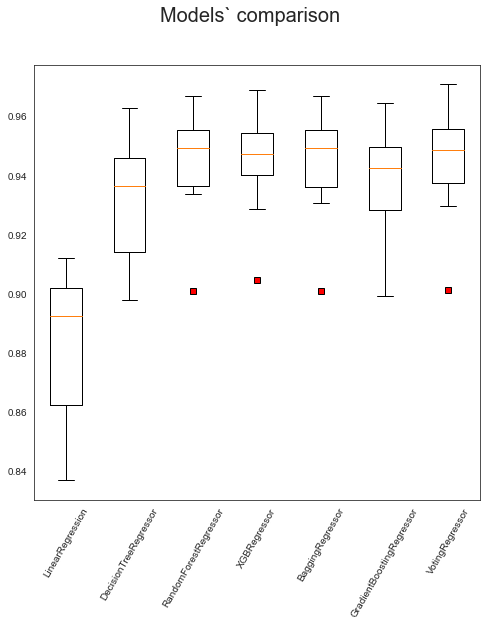

In [822]:
# Диаграмма размаха
fig = pyplot.figure(figsize=(8,8))
fig.suptitle('Models` comparison', size=20)
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results, flierprops=red_square)
ax.set_xticklabels(names, rotation=60, size=10)
pyplot.show()